### Import packages for data analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
football = pd.read_csv('playerCorrected.csv',index_col=0)
#check the number of rows
len(football)
#check data for observation
football.head(10)


,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age
nflId,,,,,,,,
25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1977-08-03,47
29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,1982-01-22,42
29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,1983-12-02,41
30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,1984-05-19,40
33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,1985-05-17,39
33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,1985-01-16,39
33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,1985-08-30,39
33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,1986-12-01,38
33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,1986-09-01,38


In [4]:
#check the data types of the columns and the number of non-null values
#check the data types of the columns and the number of non-null values

football.dtypes
football.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1697 entries, 25511 to 55241
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   height               1697 non-null   object
 1   weight               1697 non-null   int64 
 2   birthDate            1210 non-null   object
 3   collegeName          1697 non-null   object
 4   position             1697 non-null   object
 5   displayName          1697 non-null   object
 6   corrected_birthDate  1696 non-null   object
 7   Age                  1697 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 119.3+ KB


In [5]:
#check the data types of the columns and the number of non-null values
football.describe()

,weight,Age
count,1697.000000,1697.000000
mean,245.774308,28.428992
std,47.256005,3.550154
min,153.000000,0.000000
25%,205.000000,26.000000
50%,236.000000,28.000000
75%,291.000000,30.000000
max,380.000000,74.000000


In [6]:
#check the data types of the columns and the number of non-null values
football.describe(include='all')   

,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age
count,1697,1697.000000,1210,1697,1697,1697,1696,1697.000000
unique,16,NaN,989,225,19,1687,1321,NaN
top,6-3,NaN,1997-08-20,Alabama,WR,Michael Carter,1998-06-09,NaN
freq,258,NaN,4,59,224,2,5,NaN
mean,NaN,245.774308,NaN,NaN,NaN,NaN,NaN,28.428992
std,NaN,47.256005,NaN,NaN,NaN,NaN,NaN,3.550154
min,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,205.000000,NaN,NaN,NaN,NaN,NaN,26.000000
50%,NaN,236.000000,NaN,NaN,NaN,NaN,NaN,28.000000
75%,NaN,291.000000,NaN,NaN,NaN,NaN,NaN,30.000000


In [7]:
# Add a new column to split the month from the birthDate column
football['birthMonth'] = pd.to_datetime(football['birthDate'], errors='coerce').dt.month
# Add a new column to extract the year from the birthDate column
football['birthYear'] = pd.to_datetime(football['birthDate'], errors='coerce').dt.year
football.head(10)

,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age,birthMonth,birthYear
nflId,,,,,,,,,,
25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1977-08-03,47,8.0,1977.0
29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,1982-01-22,42,1.0,1982.0
29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,1983-12-02,41,12.0,1983.0
30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,1984-05-19,40,5.0,1984.0
33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,1985-05-17,39,5.0,1985.0
33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,1985-01-16,39,1.0,1985.0
33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,1985-08-30,39,8.0,1985.0
33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,1986-12-01,38,12.0,1986.0
33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,1986-09-01,38,9.0,1986.0


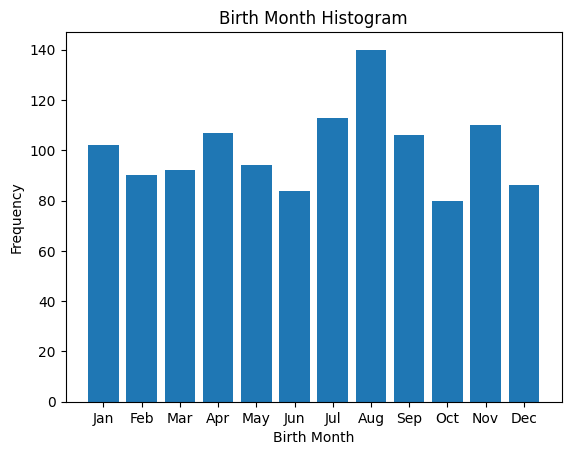

In [8]:
#create a histogram of the birthMonth column
# Count the occurrences of each month
# Note: The histogram will not show months with 0 occurrences.
histogram = football['birthMonth'].value_counts().sort_index()
histogram
# Plotting the histogram
import matplotlib.pyplot as plt

# Update x-axis labels to include all 12 months
plt.bar(range(1, 13), [histogram.get(i, 0) for i in range(1, 13)])
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Birth Month')
plt.ylabel('Frequency')
plt.title('Birth Month Histogram')
plt.show()

In [9]:
#create a pivot of the birthMonth column and the birthYear column
# Create a pivot table to count the number of players born in each month for each year
pivot_table = football.pivot_table(index='birthYear', columns='birthMonth', aggfunc='size', fill_value=0)
# Display the pivot table
pivot_table

birthMonth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
birthYear,,,,,,,,,,,,
1977.0,0,0,0,0,0,0,0,1,0,0,0,0
1982.0,1,0,0,0,0,0,0,0,0,0,0,0
1983.0,0,0,0,0,0,0,0,0,0,0,0,1
1984.0,0,0,0,0,1,0,0,0,0,0,0,0
1985.0,1,0,0,0,1,0,1,1,1,2,0,0
1986.0,0,0,0,0,0,0,0,0,1,1,0,1
1987.0,0,0,1,0,1,0,0,1,1,1,2,0
1988.0,0,2,0,2,1,3,3,2,0,0,1,1
1989.0,4,3,2,2,2,3,4,2,1,2,2,1
